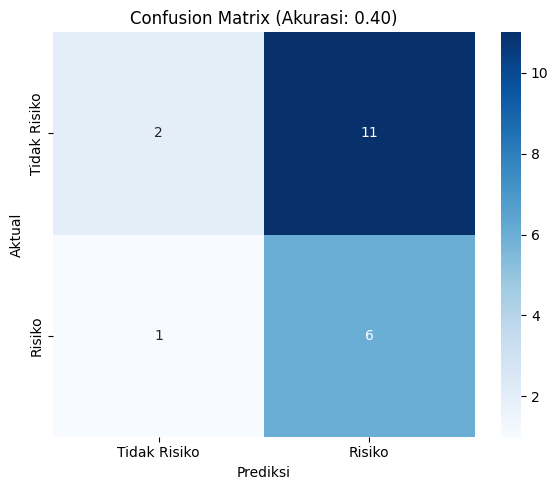

              precision    recall  f1-score   support

           0       0.67      0.15      0.25        13
           1       0.35      0.86      0.50         7

    accuracy                           0.40        20
   macro avg       0.51      0.51      0.38        20
weighted avg       0.56      0.40      0.34        20



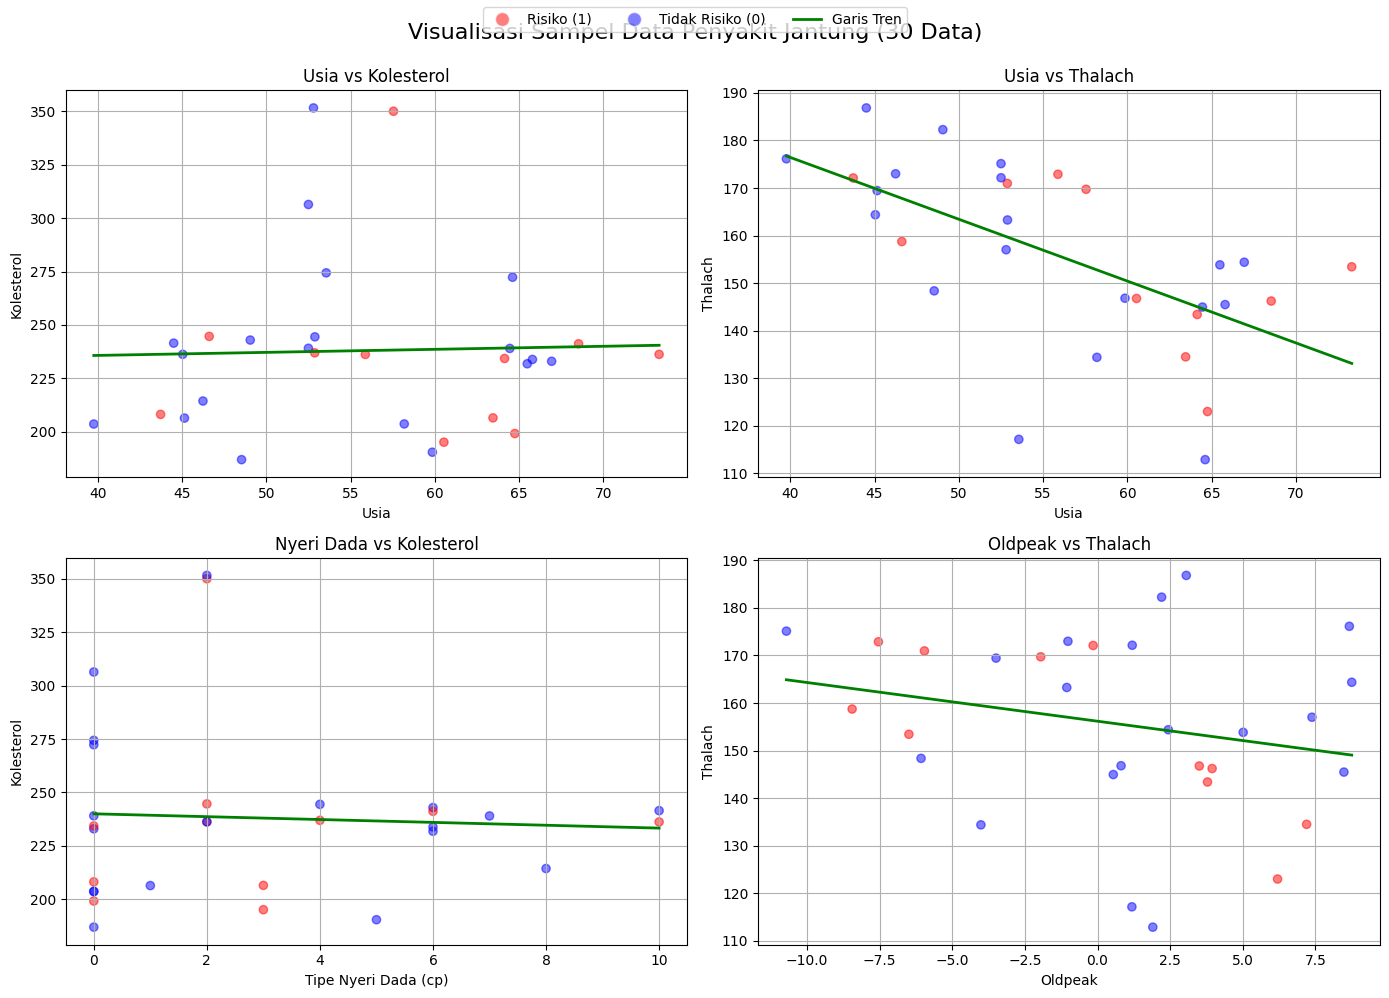

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Load dataset dari file CSV
df_expanded = pd.read_csv("heart_disease_expanded.csv")

# 2. Regresi Logistik
X = df_expanded.drop(columns='target')
y = df_expanded['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 3. Evaluasi Model
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Tidak Risiko", "Risiko"],
            yticklabels=["Tidak Risiko", "Risiko"])
plt.title(f'Confusion Matrix (Akurasi: {acc:.2f})')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()

print(report)

# 4. Visualisasi dengan sampel 30 data & transparansi
df_sample = df_expanded.sample(n=30, random_state=42)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

def add_clean_plot(ax, x, y, x_label, y_label, title, df):
    ax.scatter(df[x], df[y], c=df['target'].map({0: 'blue', 1: 'red'}), alpha=0.5)
    coef = np.polyfit(df[x], df[y], 1)
    poly1d_fn = np.poly1d(coef)
    ax.plot(np.sort(df[x]), poly1d_fn(np.sort(df[x])), color='green', linewidth=2)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.grid(True)

add_clean_plot(axs[0, 0], 'age', 'chol', 'Usia', 'Kolesterol', 'Usia vs Kolesterol', df_sample)
add_clean_plot(axs[0, 1], 'age', 'thalach', 'Usia', 'Thalach', 'Usia vs Thalach', df_sample)
add_clean_plot(axs[1, 0], 'cp', 'chol', 'Tipe Nyeri Dada (cp)', 'Kolesterol', 'Nyeri Dada vs Kolesterol', df_sample)
add_clean_plot(axs[1, 1], 'oldpeak', 'thalach', 'Oldpeak', 'Thalach', 'Oldpeak vs Thalach', df_sample)

red_patch = plt.Line2D([0], [0], marker='o', color='w', label='Risiko (1)',
                       markerfacecolor='red', markersize=10, alpha=0.5)
blue_patch = plt.Line2D([0], [0], marker='o', color='w', label='Tidak Risiko (0)',
                        markerfacecolor='blue', markersize=10, alpha=0.5)
green_line = plt.Line2D([0], [0], color='green', lw=2, label='Garis Tren')
fig.legend(handles=[red_patch, blue_patch, green_line], loc='upper center', ncol=3)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('Visualisasi Sampel Data Penyakit Jantung (30 Data)', fontsize=16)
plt.show()
